In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [ ]:
df.groupby('cp',as_index=False)['target'].mean()

In [ ]:
df.groupby('slope',as_index=False)['target'].mean()

In [ ]:
df.groupby('thal',as_index=False)['target'].mean()

In [ ]:
df.groupby('target').mean()

In [ ]:
sns.distplot(df['target'],rug=True)
plt.show()

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(25,8),color=['gold','brown' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['cyan','coral' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df['target'], df['trestbps'], palette = 'rainbow')
plt.title('Relation of tresbps with target', fontsize = 10)

In [ ]:
# sns.pairplot(data=df)

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],c='blue')
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],c='black')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,2)
plt.scatter(x=df.age[df.target==1],y=df.chol[df.target==1],c='red')
plt.scatter(x=df.age[df.target==0],y=df.chol[df.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,3)
plt.scatter(x=df.age[df.target==1],y=df.trestbps[df.target==1],c='cyan')
plt.scatter(x=df.age[df.target==0],y=df.trestbps[df.target==0],c='fuchsia')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.subplot(2,2,4)
plt.scatter(x=df.age[df.target==1],y=df.oldpeak[df.target==1],c='grey')
plt.scatter(x=df.age[df.target==0],y=df.oldpeak[df.target==0],c='navy')
plt.xlabel('Age')
plt.ylabel('ST depression')
plt.legend(['Disease','No Disease'])
plt.show()

In [ ]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df['restecg'],prefix='restecg')
frames=[df,sp,th,rest_ecg]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [ ]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))

# Adding the second hidden layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the model
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

In [76]:
def get_model():
    inputs = keras.Input(shape=(22,))
    outputs = keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')(inputs)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ['accuracy'])
    return model


model = get_model()

test_input = X_train
test_target = y_train
model.fit(test_input, test_target)

8/8 [==============================] - 1s 3ms/step - loss: 0.6881 - accuracy: 0.5408


In [77]:
from keras.models import model_from_json
model.save("ANN_model.h5")

In [83]:
load = keras.models.load_model("/content/ANN_model.h5")
np.testing.assert_allclose(
    model.predict(test_input), load.predict(test_input)
)
load.fit(test_input, test_target)


8/8 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6736


In [86]:
###########################
from sklearn.preprocessing import MinMaxScaler
import numpy as np
model = keras.models.load_model("/content/ANN_model.h5")
X = [[50.0, 90.0, 2.0, 1.02, 1.0, 1.0, 1.0, 0, 70.0,
      107.0, 7.2, 3.7, 12100.0, 1.0, 1.0, 0.0, 0.0, 1.0,2.0,2.0,21.0, 5.0]]
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(X)

float_features = [float(x) for x in range(1,23)]
final_features = [np.array(float_features)]
prediction = model.predict(sc.transform(final_features))


In [93]:
# Prediction using artificial neural networks

from sklearn.model_selection import train_test_split
import keras
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from flask import Flask, request, render_template
from keras.models import load_model
import flask
import numpy as np
import tensorflow as tf

def init():
    global model
    model = load_model("/content/ANN_model.h5")
    return model


Test = [[50.0, 90.0, 2.0, 1.02, 1.0, 1.0, 1.0, 0, 70.0,
         107.0, 7.2, 3.7, 12100.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 2.0, 21.0, 5.0]]
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(Test)



def predict():
    flask_user_inputs = 50.0, 90.0, 2.0, 1.02, 1.0, 1.0, 1.0, 0, 70.0,107.0, 7.2, 3.7, 12100.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 2.0, 21.0, 5.0
    float_features = [float(x) for x in flask_user_inputs]
    final_features = [np.array(float_features)]
    prediction = init().predict(sc.transform(final_features))
    if (prediction > 0.5) or (prediction == 1.0):
        pred = "You have a HeartDisease!"
    elif (prediction < 0.5) or (prediction == 0):
        pred = "You don't have a HeartDisease"
    return pred
    


predict()




'You have a HeartDisease!'

In [81]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [82]:

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print("ANN Accuracy: ", ac * 100)

ANN Accuracy:  86.88524590163934


Text(0.5, 1.0, 'ANN Confusion Matrix')

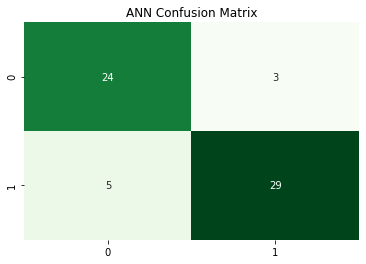

In [ ]:
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Greens",fmt="d",cbar=False)
plt.title("ANN Confusion Matrix")

In [ ]:
# Random forest model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(X_train, y_train)

In [ ]:
rf_predict = rf.predict(X_test)

In [ ]:
# rf accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(rf_predict, y_test)
print('Random Forest Accuracy: ',ac * 100)

Random Forest Accuracy:  80.32786885245902


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

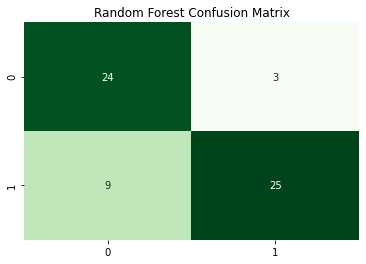

In [ ]:
# confusion matrix for random forest cancer
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_predict)
sns.heatmap(cm,annot=True,cmap="Greens",fmt="d",cbar=False)
plt.title("Random Forest Confusion Matrix")